<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Sequence Modeling</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

np.random.seed(123)

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark

Last updated: 2022-10-29T15:31:19.929954-04:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 151 Stepping 2, GenuineIntel
CPU cores   : 24
Architecture: 64bit



In [3]:
plt.style.use('seaborn')

# IMDB Dataset 

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "UNUSED"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = keras.utils.pad_sequences(X_train, maxlen=max_words)
X_test = keras.utils.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN Model 

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
196/196 [==============================] - 10s 51ms/step - loss: 0.6396 - accuracy: 0.6272 - val_loss: 0.4837 - val_accuracy: 0.7771
Epoch 2/10
196/196 [==============================] - 9s 48ms/step - loss: 0.3596 - accuracy: 0.8491 - val_loss: 0.3662 - val_accuracy: 0.8465
Epoch 3/10
196/196 [==============================] - 9s 48ms/step - loss: 0.2256 - accuracy: 0.9155 - val_loss: 0.3557 - val_accuracy: 0.8595
Epoch 4/10
196/196 [==============================] - 9s 48ms/step - loss: 0.1407 - accuracy: 0.9520 - val_loss: 0.4077 - val_accuracy: 0.8430
Epoch 5/10
196/196 [==============================] - 9s 48ms/step - loss: 0.0776 - accuracy: 0.9769 - val_loss: 0.4717 - val_accuracy: 0.8190
Epoch 6/10
196/196 [==============================] - 10s 49ms/step - loss: 0.0428 - accuracy: 0.9886 - val_loss: 0.5031 - val_accuracy: 0.8376
Epoch 7/10
196/196 [==============================] - 9s 48ms/step - loss: 0.0336 - accuracy: 0.9910 - val_loss: 0.5411 - val_accuracy: 0.85

In [9]:
def plot_history(history):
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)
    
    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')    
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')    
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    
    fig.tight_layout()

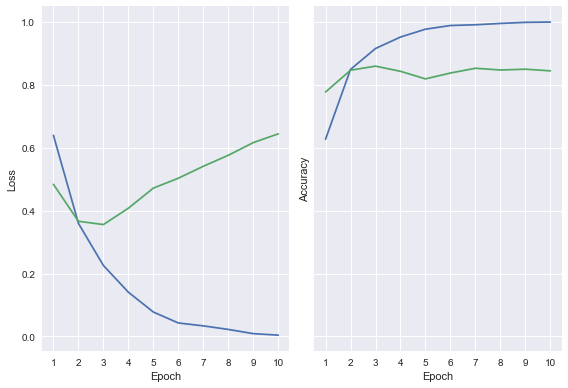

In [10]:
plot_history(history)

# GRU

In [11]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
196/196 [==============================] - 22s 105ms/step - loss: 0.4859 - accuracy: 0.7486 - val_loss: 0.3296 - val_accuracy: 0.8595
Epoch 2/10
196/196 [==============================] - 20s 103ms/step - loss: 0.2525 - accuracy: 0.9018 - val_loss: 0.3118 - val_accuracy: 0.8724
Epoch 3/10
196/196 [==============================] - 20s 102ms/step - loss: 0.1930 - accuracy: 0.9295 - val_loss: 0.3255 - val_accuracy: 0.8692
Epoch 4/10
196/196 [==============================] - 20s 104ms/step - loss: 0.1666 - accuracy: 0.9411 - val_loss: 0.3393 - val_accuracy: 0.8648
Epoch 5/10
196/196 [==============================] - 20s 103ms/step - loss: 0.1377 - accuracy: 0.9531 - val_loss: 0.3772 - val_accuracy: 0.8591
Epoch 6/10
196/196 [==============================] - 20s 103ms/step - loss: 0.1234 - accuracy: 0.9591 - val_loss: 0.4069 - val_accuracy: 0.8648
Epoch 7/10
196/196 [==============================] - 20s 102ms/step - loss: 0.1022 - accuracy: 0.9652 - val_loss: 0.4503 - val_ac

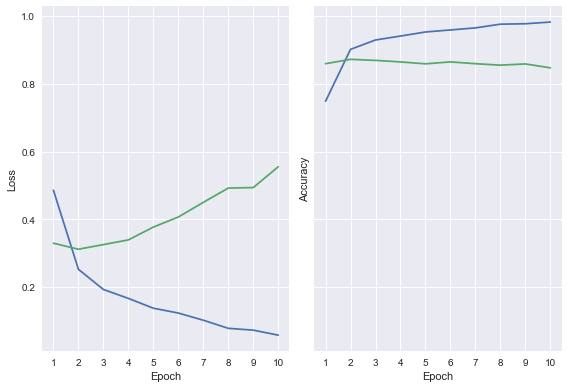

In [14]:
plot_history(history)

# LSTM

In [15]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
196/196 [==============================] - 25s 125ms/step - loss: 0.4696 - accuracy: 0.7776 - val_loss: 0.3209 - val_accuracy: 0.8670
Epoch 2/10
196/196 [==============================] - 24s 124ms/step - loss: 0.2502 - accuracy: 0.9038 - val_loss: 0.3025 - val_accuracy: 0.8764
Epoch 3/10
196/196 [==============================] - 24s 123ms/step - loss: 0.1852 - accuracy: 0.9345 - val_loss: 0.3063 - val_accuracy: 0.8758
Epoch 4/10
196/196 [==============================] - 24s 124ms/step - loss: 0.1463 - accuracy: 0.9502 - val_loss: 0.3748 - val_accuracy: 0.8707
Epoch 5/10
196/196 [==============================] - 24s 123ms/step - loss: 0.1210 - accuracy: 0.9602 - val_loss: 0.4423 - val_accuracy: 0.8613
Epoch 6/10
196/196 [==============================] - 24s 123ms/step - loss: 0.1062 - accuracy: 0.9659 - val_loss: 0.3994 - val_accuracy: 0.8615
Epoch 7/10
196/196 [==============================] - 24s 123ms/step - loss: 0.1273 - accuracy: 0.9547 - val_loss: 0.4125 - val_ac

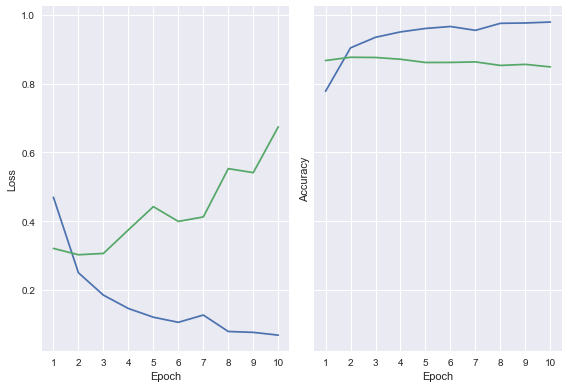

In [18]:
plot_history(history)